```















```

In the previous chapter we ended off by talking about the "birthday problem" and used simulation to stumble upon a surprising result. But when we solved the problem we relied on the assumption that *every single birthday is equally likely*. Is this really a valid assumption?

What if in actuality less people are born over the summer, or perhaps more people are born nine months after Valentines day? In that case, certain birthdays would be more likely than others.

One way to check this assumption is to ask everyone in the world what their birthday is and see if the resulting distribution of birthdays is uniform... good luck with that! As it turns out, it's not feasible to ask billions of people when their birthdays are. But, we can get a pretty good idea of how birthdays are distributed by collecting a *sample* of the population.

This is precisely the concept we'll discuss in this chapter.

Many interersting data-driven questions revolve around understanding some aspect of a 'population' -- be it all people in the world, all users of a specific app, or even something like all houses in the South of France. In practice, we often can't collect data on the entire population, so instead we rely on samples to give us a representative idea of what the population actually looks like, or how it actually behaves.

## Populations

A {dterm}`population` in data science and statistics is an entire group of people, objects, or events on which we're capable of collecting data to answer a specific question. The answers to questions like "do people prefer to watch content A or content B" or "what is a typical price for a house" are dependent on what *population* of people or houses they're referring to. Interestingly, a population can also refer to a group of events, such as "all fair dice rolls".

### Specifying a population

There are two steps we follow to narrow in on a population.
1. What population is our question about?

    Maybe we're only interested in particular group -- like house prices specifically in the South of France. Therefore, our population would be narrowed down from all houses in the world to just houses in the South of France.
    
2. What population can we collect data from?

    Our data collection is often a limiting factor -- like if we're running a survey hosted on our website then we can only collect data on the people who come to our site. Therefore, our population is narrowed down from all users of the internet to just users who visit our site. Even if we wanted a larger population, our population is always limited by the data we collect.

In the birthday problem above, we're probably interested in the population being the entire world -- are *all* birthdays actually equally likely across the globe? However, in later exploration we'll be using [a data set](https://github.com/fivethirtyeight/data/tree/master/births) that was sampled from the United States, therefore we must narrow our population to only birthdays in the U.S. since that's the population that our data is coming from.

### Population distributions

Recall that knowing the *distribution* of some data is imperitive to understanding and gaining insight from the data. The distribution is referred to as the 'shape' of the data, or simply 'what the data *looks* like'.

The {dterm}`population distribution` would arise if we were able to measure a feature across the entire specified population, and in most settings the population distribution is considered *fixed* -- unchanging -- for the duration of a study. Notice that even something like the distribution of birthdays in the U.S., which technically changes every time someone is born or dies, is unlikely to change by a significant amount over the course of a study.

In most cases we don't know and will never know the true population distribution. However, in the birthday scenario above we operated under the *assumption* every birthday is equally likely when pulling someone randomly from the population. Under this assumption, our population distribution is assumed to be *uniform*. We're ignoring leap years for simplicity.

Text(0, 0.5, 'density')

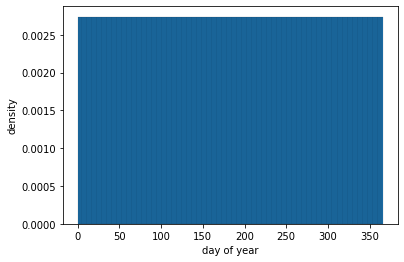

In [2]:
#: Replace this cell with a drawing of a uniform population distribution

import matplotlib.pyplot as plt
import numpy as np

N = 330_221_340

b = np.repeat(1/365, 365)

plt.bar(range(1,366), b, width=1, edgecolor='k', lw=0.1)
plt.xlabel("day of year")
plt.ylabel("density")

**Question**:
 At the time of this writing, the United States populace is approximately $330,221,340$ people. Let's call the population size $N$. Since each of the 365 days in a year is assumed to be equally likely $P(\text{day})=\frac{1}{365}$ and we're using a frequentist approach to probability, $P(\text{day})=\frac{\text{# people with this birthday}}{N}$, we can calculate the number of people in the U.S. that we're assuming have their birthday on any given day.

<details><summary><b>Answer</b>:</summary>$$
\begin{aligned}
N &= 320,221,340 \\
\\
P(\text{day}) &= \frac{1}{365} = \frac{\text{# people with this birthday}}{N} \\
\\
\text{# people with this birthday} &= \frac{365}{N} \\
&= 904,716 \\
\end{aligned}
$$</details>

Buuuuut, the distribution above is still only an assumption. An assumption for which we still don't know the validity. As far as we know, the actual population distribution of birthdays in the U.S. could look quite a bit different from uniform!

![other possible population distributions]

The truth is: we don't know, and we'll never know what the *true* population distribution is for most measurements since we can't collect data on every individual in the population!

#### Probability distributions

Fortunately, a noteable exception to this dilemma comes to mind: we *do* know the true population distribution for *probability distributions*.

Suppose we're working with a different population, such as "the outcomes of all fair six-sided dice rolls". In this case, we know *by definition of 'fair'* that the true population distribution is the uniform distribution.

![uniform dice roll distribution]

When we're working with a probability distribution, we already know the probability of each outcome, so we already know the height of each bar/bin in the corresponding probability distribution! The uniform distribution just happens to be where all outcomes have equal probability, but there are *loads* of probability distributions out there. For example, you may have seen the 'bell curve', officially known as the Normal or Gaussian distribution, before!

![probability distributions, normal and some others, labeled]

Why is this helpful?

Well, if we can convince ourselves that a particular population is the result of some random process for which we know the probabilities of each outcome -- such as fair dice rolls, fair card drawings, [etc] -- then we know that the true population distribution must match that probability distribution!

Other times, even if we're not sure whether or not a population arises from a probabilistic process, we can hypothesize that the population distribution looks similar to a probability distribution -- such is this case with comparing the distribution of U.S. birthdays to a uniform distribution.

## Samples

Whether we suspect that a population distribution is similar to a known probability  distribution, or if we are simply curious what our population distribution looks like, we must turn to the power of sampling.

In contrast to a population, a {dterm}`sample` is a subset of individuals randomly taken from a population. While we can't collect data from every member of a population, we usually can collect data from some of them.

### Sampling schemes

The process of collecting a sample is called *sampling*, and while there are many different ways you can sample from a population, some approaches are better than others!

For example, if we were tasked with collecting a sample of people in the U.S. in an attempt to answer the birthday assumption, we might be tempted to just ask the people around us -- you might choose to ask the people in your classes, or simply the first hundred people you encounter at your campus. This is called a *convenience sample* because, well, it's convenient. Unfortunately it's a bad practice.

Poor sampling schemes, like convenience sampling, produce samples that don't accurately represent the population. Remember that our population is determined in part by the data we're able to collect -- when conducting convenience sampling we're essentially limiting our population to our geographical area at best.

A much better sampling scheme should produce samples that are *representative* of the population. By far the most common, simple, and yet extremely powerful method of sampling is called the "*simple random sample*". NumPy has a name for it too: `np.random.choice`.

As you might already suspect, this representative sampling scheme boils down to a simple process: *pick individuals from the total population, completely at random*.

### Collecting a sample with NumPy

In order to collect a sample, we need a population to sample from.

- np.random.choice can random pick rows from a table, or elements from a list/array
- just specify the population; can also specify the size of the sample
- [code]

- [?] with/without replacement?

- let's continue working with the population of all dice rolls since we know this to be truly a uniform probability distribution -- even if we *did* have the full 320 million birthdays in the U.S., it's hard to work with that much data, Jupyter might just crash
- each time we roll a die, we're essentially sampling from the population distribution

In [ ]:
import babypandas as bpd
import numpy as np

### Sample distributions

- we need a way to quickly see if our sample *looks like* our hypothesized population -- what better way than to create a visualization with a chart! (bar or histogram)

- we know [this] to be the true population distribution for fair dice rolls, what does the distribution of the sample look like?
- as we increase sample size, the sample distribution looks closer to the population

### Why do sample distributions resemble their population?

- if we're making a representative sample -- assume random for now -- then areas of our population distribution that are more dense (higher bar) are more likely to be randomly picked from, and less likely to pick a point from lower areas
- therefore, when we plot out the distribution of our randomly chosen points, we'll expect that more of them will be from more dense areas and thus result in a higher bar in our chart, less from less dense areas thus lower bar
- obviously, there is some random chance involved meaning we most likely won't get something that looks exactly like the population -- and each sample will look a bit different too!
- the more different from our population, the less likely -- it's really rare that we'll get a large sample distribution that looks super different from our population distribution
- we can figure out how likely it is that a sample comes from a hypothesized population!

---

- we have a sample (the data)
- we can create a sample from our assumed population (equally likely) by using np.random.choice
- creating samples:
    - from probabilities, arrays, or directly from from tables!
    - with/without replacement
    - sample size
    - as size increases, samples look closer to the population
        - this is like 'law of averages' that old book uses dice rolls to show -- each time we roll a die we're essentially sampling from the uniform probability distribution (could be thought of as sampling with replacement...). the more that we sample (i.e. the more rolls we make) the closer our observed sample distribution will look like the underlying, true probability distribution.

---

- we need pictures for this chapter!!!
- we take a sample from that distribution -- more likely to pick a point from higher (more dense) areas, less likely to pick a point from lower areas
- therefore the shape of our sample (if it's representative, large enough) *should* look pretty much the same as the general shape of our population
- *but*, there's random chance involved! e.g., we might randomly pick more people from the low end
- intuitively, if sometimes in each bin we randomly select more or less people, we'd expect that on average our sample should look pretty much like the population


- just ask what the birthdays are of all your teammates on your local hokey team -- turns out more hockey players born in Q1

- easter egg about Korean birthdays?

- https://fivethirtyeight.com/features/some-people-are-too-superstitious-to-have-a-baby-on-friday-the-13th/
- https://github.com/fivethirtyeight/data/tree/master/births

Took 2000-2014 data, removed leap years (df.year %4 != 1), sum grouped by month,date_of_month, dropped year and day_of_week, added day_of_year index.

Should probably include earlier data too.

In [ ]:
import babypandas as bpd

In [ ]:
births = bpd.read_csv('../../data/us_total_births_2000-2014_no_leaps.csv')
births.sort_values('births')

In [ ]:
births.plot(kind='bar', x='day_of_year', y='births', width=1)

In [ ]:
births[(births.get('day_of_year') < 100) & (births.get('births') > 130000)]

- hmmmmm... we should probably find something that has a hist associated with it that we can do sampling with. That way we have categorical and numerical distributions!
- actually let's do this first. We can find a numerical distribution for another section -- like the predicting parameters and CLT chapter

- add Continuous Distributions and Samples section
- this could be like a "why do samples look like the population" thing
- kinda just want to explain the whole "if the histogram is higher then you're more likely to randomly pick an individual from that bin, vice-versa with lower"-spiel